# Smooth manifolds, vector fields and tensor fields

This woksheet accompanies the lecture
[Symbolic tensor calculus on manifolds](http://sagemanifolds.obspm.fr/jncf2018/) at JNCF 2018.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/JNCF2018/jncf18_vector.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

In [1]:
%display latex

Let us restore the 2-sphere manifold constructed in the [preceeding worksheet](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb):

In [2]:
M = Manifold(2, 'M')
U = M.open_subset('U')
XU.<x,y> = U.chart()
V = M.open_subset('V')
XV.<xp,yp> = V.chart("xp:x' yp:y'")
M.declare_union(U,V)
XU_to_XV = XU.transition_map(XV, 
                             (x/(x^2+y^2), y/(x^2+y^2)), 
                             intersection_name='W',
                             restrictions1= x^2+y^2!=0, 
                             restrictions2= xp^2+yp^2!=0)
XV_to_XU = XU_to_XV.inverse()
M.atlas()

We also reconstruct the point $p$:

In [3]:
p = U((1,2), chart=XU, name='p')
print(p)

Point p on the 2-dimensional differentiable manifold M


and the embedding $\mathbb{S}^2 \to \mathbb{R}^3$:

In [4]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3')
XR3.<X,Y,Z> = R3.chart()
Phi = M.diff_map(R3, {(XU, XR3): 
                       [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                        (x^2+y^2-1)/(1+x^2+y^2)],
                      (XV, XR3): 
                       [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                        (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')
Phi.display()

In [5]:
graph = XU.plot(chart=XR3, mapping=Phi, number_values=25, 
                label_axes=False) + \
        XV.plot(chart=XR3, mapping=Phi, number_values=25, 
                color='green', label_axes=False) + \
        p.plot(chart=XR3, mapping=Phi, label_offset=0.05)
show(graph, viewer='threejs', online=True)

Finally we reconstruct the scalar field $f$:

In [6]:
f = M.scalar_field({XU: 1/(1+x^2+y^2), XV: (xp^2+yp^2)/(1+xp^2+yp^2)},
                   name='f')
f.display()

and assign the Python variable `CM` to the algebra of scalar fields:

In [7]:
CM = M.scalar_field_algebra()
CM

## Tangent vectors

The tangent space at the point $p$ introduced above is generated by

In [8]:
Tp = M.tangent_space(p)
Tp

It is a vector space over $\mathbb{R}$, which is represented by Sage's Symbolic Ring:

In [9]:
print(Tp.category())

Category of finite dimensional vector spaces over Symbolic Ring


The dimension of $T_p M$ is the same as that of $M$:

In [10]:
dim(Tp)

Tangent spaces are implemented as a class inherited from `TangentSpace` via the category framework:

In [11]:
type(Tp)

The class `TangentSpace` actually inherits from the generic class
`FiniteRankFreeModule`, which, in SageMath, is devoted to free modules of finite rank
without any distinguished basis:

In [12]:
isinstance(Tp, FiniteRankFreeModule)

Two bases of $T_p M$ are already available: those generated by the derivations
at $p$ along the coordinates of charts `XU` and `XV` respectively:

In [13]:
Tp.bases()

None of these bases is distinguished, but one if the default one, which
simply means that it is the basis to be considered if the basis argument
is skipped in some methods:

In [14]:
Tp.default_basis()

A tangent vector is created as an element of the tangent space by the
standard SageMath procedure
`new\_element = parent(...)`, where `...`
stands for some material sufficient to construct the element:

In [15]:
vp = Tp((-3, 2), name='v')
print(vp)

Tangent vector v at Point p on the 2-dimensional differentiable manifold M


Since the basis is not specified, the pair $(-3,2)$ refers to components
with respect to the default basis:

In [16]:
vp.display()

We have of course

In [17]:
vp.parent()

In [18]:
vp in Tp

As other manifold objects, tangent vectors have some plotting capabilities:

In [19]:
graph += vp.plot(chart=XR3, mapping=Phi, scale=0.5, color='gold')
show(graph, viewer='threejs', online=True)

## Module of vector fields

The $C^\infty(M)$-module of vector fields on $M$, $\mathfrak{X}(M)$, is obtained as

In [20]:
YM = M.vector_field_module()
YM

In [21]:
YM.category()

In [22]:
YM.base_ring() is CM

$\mathfrak{X}(M)$ is not a free module (at least its SageMath implementation does not
belong to the class `FiniteRankFreeModule`):

In [23]:
isinstance(YM, FiniteRankFreeModule)

This is because $M=\mathbb{S}^2$ is not a parallelizable manifold:

In [24]:
M.is_manifestly_parallelizable()

Via the category mechanism,
the module $\mathfrak{X}(M)$ is implemented by a dynamically-generated subclass
of the class `VectorFieldModule`, which is devoted to modules of vector fields
on non-parallelizable manifolds:

In [25]:
type(YM)

On the contrary, the set $\mathfrak{X}(U)$ of vector fields on $U$ is a free module of finite rank over the algebra $C^\infty(U)$:

In [26]:
YU = U.vector_field_module()
isinstance(YU, FiniteRankFreeModule)

In [27]:
YU.base_ring()

This is because the open subset $U$ is a parallelizable manifold:

In [28]:
U.is_manifestly_parallelizable()

being a coordinate chart domain:

In [29]:
U.is_manifestly_coordinate_domain()

We can check that in the atlas of $U$, at least one chart has $U$ for domain:

In [30]:
U.atlas()

The rank of $\mathfrak{X}(U)$ is the manifold's dimension:

In [31]:
rank(YU)

Via the category mechanism,
the free module $\mathfrak{X}(U)$ is implemented by a dynamically-generated subclass
of the class `VectorFieldFreeModule`, which is devoted to modules of vector fields
on parallelizable manifolds:

In [32]:
type(YU)

The class `VectorFieldFreeModule` is itself a subclass
of the generic class `FiniteRankFreeModule`:

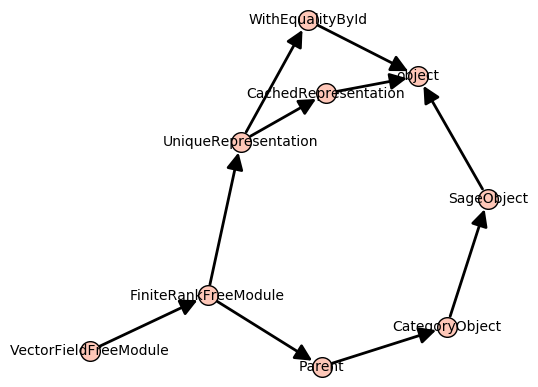

In [33]:
class_graph(
sage.manifolds.differentiable.vectorfield_module.VectorFieldFreeModule
).plot()

Since $U$ is a chart domain, the free module $\mathfrak{X}(U)$ is automatically endowed with a basis: the coordinate frame associated to the chart:

In [34]:
YU.bases()

Let us denote by `eU` this frame. We can set `eU = YU.bases()[0]` or
alternatively

In [35]:
eU = YU.default_basis()
eU

Another equivalent instruction would have been `eU = U.default_frame()`.

Similarly, $\mathfrak{X}(V)$ is a free module, endowed with the coordinate frame
associated to stereographic coordinates from the South pole, which we
denote by `eV`:

In [36]:
YV = V.vector_field_module()
YV.bases()

In [37]:
eV = YV.default_basis()
eV

If we consider the intersection $W=U\cap V$, we notice its module
of vector fields is endowed with two bases, reflecting the fact that
$W$ is covered by two charts: $(W,(x,y))$ and $(W,(x',y'))$:

In [38]:
W = U.intersection(V)
YW = W.vector_field_module()
YW.bases()

Let us denote by `eUW` and `eUV` these two bases, which are
actually the restrictions of the vector frames `eU` and `eV` to $W$:

In [39]:
eUW = eU.restrict(W)
eVW = eV.restrict(W)
YW.bases() == [eUW, eVW]

The free module $\mathfrak{X}(W)$ is also automatically endowed with automorphisms
connecting the two bases, i.e. change-of-frame operators:

In [40]:
W.changes_of_frame()

The first of them is

In [41]:
P = W.change_of_frame(eUW, eVW)
P

It belongs to the general linear group of the free module $\mathfrak{X}(W)$:

In [42]:
P.parent()

and its matrix is deduced from the Jacobian matrix of the transition map `XV` $\to$ `XU`:

In [43]:
P[:]

## An example of vector field

We introduce a vector field $v$ on $M$ by

In [44]:
v = M.vector_field(name='v')
v[eU, 0] = f.restrict(U)
v[eU, 1] = -2
v.display(eU)

Notice that at this stage, we have defined $v$ only on $U$, by setting
its components in the vector frame `eU`, either explicitely as scalar
fields, like the component $v^0$ set to the restriction of $f$ to $U$ or
to some symbolic expression, like for the component $v^1$: the $-2$
will be coerced to the constant scalar field of value $-2$.
We can ask for the scalar-field value of a components via the double-bracket
operator, since `eU` is the default frame on $M$, we don't have to specify
it:

In [45]:
v[[0]]

In [46]:
v[[0]].display()

Note that the single bracket operator returns a chart function
of the component:

In [47]:
v[0]

The restriction of $v$ to $W$ is of course

In [48]:
v.restrict(W).display(eUW)

Since we have a second vector frame on $W$, namely `eVW`, and the
change-of-frame automorphisms are known, we can ask for the components
of $v$ with respect to that frame:

In [49]:
v.restrict(W).display(eVW)

Notice that the components are expressed in terms of the coordinates $(x,y)$
since they form the default chart on $W$. To have them expressed in
terms of the coordinates $(x',y')$, we have to add the restriction of
the chart
$(V,(x',y'))$ to $W$ as the second argument of the method `display()`:

In [50]:
v.restrict(W).display(eVW, XV.restrict(W))

We extend the expression of $v$ to the full vector frame `XV`
by continuation of this expression:

In [51]:
v.add_comp_by_continuation(eV, W, chart=XV)

We have then

In [52]:
v.display(eV)

At this stage, the vector field $v$ is defined in all $M$.
According to the hairy ball theorem\index{hairy ball theorem}, it has to vanish somewhere.
Let us show that this occurs at the North pole, by first introducing the
latter, as the point of stereographic coordinates $(x',y')=(0,0)$:

In [53]:
N = M((0,0), chart=XV, name='N')
print(N)

Point N on the 2-dimensional differentiable manifold M


As a check, we verify that the image of $N$ by the canonical embedding
$\Phi: \mathbb{S}^2 \to \mathbb{R}^3$ is the point of Cartesian coordinates $(0,0,1)$:

In [54]:
XR3(Phi(N))

The vanishing of $\left. v\right| _N$:

In [55]:
v.at(N).display()

On the other hand, $v$ does not vanish at the point $p$ introduced above:

In [56]:
v.at(p).display()

We may plot the vector field $v$ in terms of the stereographic coordinates
from the North pole:

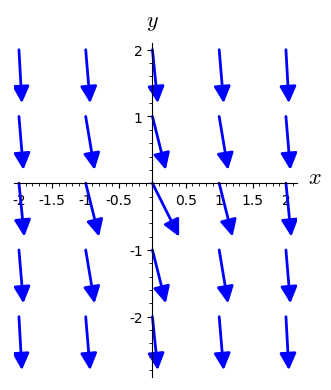

In [57]:
v.plot(chart=XU, chart_domain=XU, max_range=2, 
       number_values=5, scale=0.4, aspect_ratio=1)

or in term of those from the South pole:

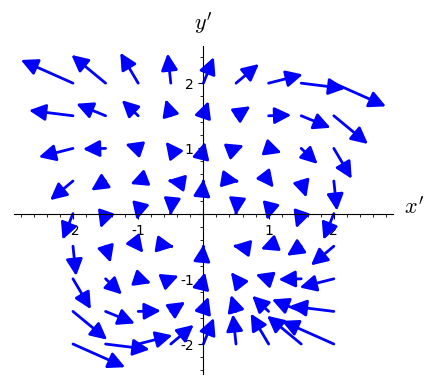

In [58]:
v.plot(chart=XV, chart_domain=XV, max_range=2, 
       number_values=9, scale=0.05, aspect_ratio=1)

Thanks to the embedding $\Phi$, we may also have a 3D plot of $v$
atop of the 3D plot already obtained:

In [59]:
graph_v = v.plot(chart=XR3, mapping=Phi, chart_domain=XU, 
                 number_values=7, scale=0.2) + \
          v.plot(chart=XR3, mapping=Phi, chart_domain=XV, 
                 number_values=7, scale=0.2)
show(graph + graph_v, viewer='threejs', online=True)

Note that the sampling, performed on the two charts `XU` and `XV`
is not uniform on the sphere. A better sampling would be acheived by introducing
spherical coordinates.

### Some details about the implementation of vector fields

Since $M$ is not parallelizable, the fundamental representation of a
vector field on $M$ is via its restrictions to parallelizable open subsets;
they are stored in the dictionary `_restrictions`, whose keys are
the open subsets:

In [60]:
v._restrictions

Let us consider one of these restrictions, for instance the restriction to $U$:

In [61]:
vU = v._restrictions[U]
vU is v.restrict(U)

Since $U$ is a parallelizable open subset, the fundamental representation
of $v$ on it is via its components with respect to (possibly various)
vector frames on $U$; they are stored in the dictionary `_components`,
whose keys are the vector frames:

In [62]:
vU._components

In [63]:
v._restrictions[W]._components

Let us perform some algebraic operation on $v$:

In [64]:
w = v + f*v
w

The code for the addition is defined is accessible via

In [65]:
v.__add__??

As for the addition of scalar field (cf. [this worksheet](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb)), we see that `__add__()` is implemented at the level
of the generic class `Element` from which `VectorField` inherits.
When both operands of the addition have the same parent, as here, `__add__()` invokes the
method `_add_()`
(note the single underscore on each side of `add`). This operator is
implemented at the level of `TensorField`, as it can be checked from the source code:

In [66]:
v._add_??

In [67]:
vU._add_??

### Action of a vector field on a scalar field

In [65]:
vf = v(f)
vf

In [66]:
vf.display()

# Tensor fields

Let us start with a 1-form, namely the differential of $f$:

In [67]:
df = f.differential()
df

In [68]:
print(df)

1-form df on the 2-dimensional differentiable manifold M


In [69]:
df.tensor_type()

In [70]:
v.tensor_type()

We construct a tensor of type $(1,1)$ by taking the tensor product $v\otimes \mathrm{d}f$:

In [71]:
t = v * df
t

In [72]:
t.display()

In [73]:
t.display(eV)

In [74]:
t.display_comp()

In [75]:
t.parent()

In [76]:
t._restrictions